In [1]:
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv('amazon_reviews_sample.csv')

In [10]:
data.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [16]:
data.drop("Unnamed: 0",axis = 1, inplace = True)

In [15]:
data.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [20]:
data.columns

Index(['score', 'review'], dtype='object')

In [21]:
data.score.value_counts()

0    5097
1    4903
Name: score, dtype: int64

In [23]:
length = data.review.str.len()

In [24]:
max(length)

1018

In [25]:
min(length)

104

In [28]:
import pip 
pip .main(['install','textblob'])

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl


0

In [29]:
from textblob import TextBlob

In [56]:
my_text = TextBlob("such a best choice!")

In [57]:
my_text.polarity

0.5

In [58]:
my_text.subjectivity

0.4

In [59]:
my_text.pos_tags

[('such', 'JJ'), ('a', 'DT'), ('best', 'JJS'), ('choice', 'NN')]

In [60]:
my_text.sentiment

Sentiment(polarity=0.5, subjectivity=0.4)

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [88]:
review_data = data['review']
review_data1 = str(review_data)

In [89]:
cloud = WordCloud().generate(review_data1)

(-0.5, 399.5, 199.5, -0.5)

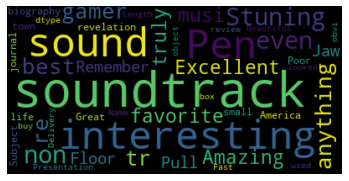

In [92]:
plt.imshow(cloud,interpolation="bilinear")
plt.axis("off")

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
vector = CountVectorizer(max_features=1000)
vector.fit(data.review)
transformed_vect = vector.transform(data.review)

In [98]:
my_array = transformed_vect.toarray()

In [99]:
my_array

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [100]:
array_df = pd.DataFrame(my_array,columns= vector.get_feature_names())

In [102]:
array_df.head()

,10,100,12,15,1984,20,30,40,451,50,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,0
